In [82]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [123]:
im = Image.open('../datasets/train/animal/im_000018.png')



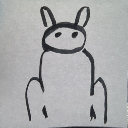

In [124]:
im

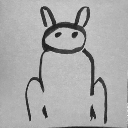

In [125]:
bw = im.convert('L')
bw

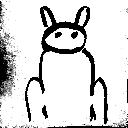

In [126]:
enhancer = ImageEnhance.Contrast(bw)
contrasted = enhancer.enhance(30)
contrasted


In [127]:
N = 115

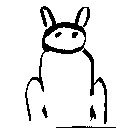

In [128]:
ar = np.array(bw)
filtered_ar = ar >= N
Image.fromarray(filtered_ar)

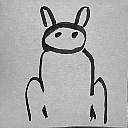

In [129]:
sharper = bw.filter(ImageFilter.SHARPEN)
sharper

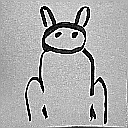

In [130]:
enhanced_edges = bw.filter(ImageFilter.EDGE_ENHANCE)
enhanced_edges

In [131]:
np.array(bw).mean()

170.31646728515625

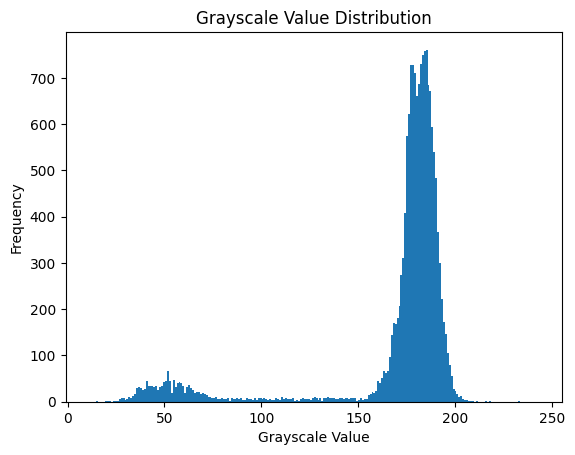

In [132]:
hist, bins = np.histogram(np.array(bw), bins=257, range=(-1, 255))

# Plot the histogram
plt.bar(bins[:-1], hist, width=1)
plt.xlim(min(bins), max(bins))
plt.title('Grayscale Value Distribution')
plt.xlabel('Grayscale Value')
plt.ylabel('Frequency')
plt.show()

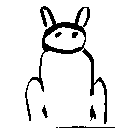

In [133]:
thresholded = bw.point(lambda x: 255 if x > 110 else 0)
thresholded

In [134]:
hist

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   1,   1,   1,   0,   1,
         1,   2,   5,   7,   9,   3,   6,  11,   8,  12,  16,  30,  31,
        29,  25,  27,  44,  33,  34,  35,  32,  33,  26,  31,  33,  43,
        44,  66,  44,  18,  47,  31,  40,  43,  40,  34,  19,  32,  36,
        29,  26,  18,  20,  22,  16,  18,  16,  14,  10,  10,   9,   7,
        11,   5,   6,   8,   6,   6,   7,   2,   7,   5,   5,   7,   5,
         8,   3,   3,   8,   6,   5,   4,   7,   3,   7,   8,   5,   8,
         6,   3,   5,   3,   4,   9,   5,   3,  10,   6,   7,   5,   5,
         6,   9,   2,   4,   1,   5,   7,   6,   5,   5,   4,   9,  10,
         9,   4,   7,   2,   7,   7,  11,   8,   8,   7,   6,   5,   7,
         9,   6,   7,   8,   5,   8,   9,   9,   2,   4,   7,   4,   6,
         5,  15,  17,  20,  19,  23,  44,  40,  52,  67,  63,  66,  97,
       144, 171, 167, 180, 206, 275, 311, 409, 574, 622, 729, 72

In [135]:
hist2, bins2 = np.histogram(np.array(bw), bins=25, range=(-1, 255))

In [136]:
hist2

array([   0,    1,   28,  171,  371,  407,  236,   96,   61,   56,   56,
         50,   68,   75,   65,  193, 1488, 6161, 5907,  863,   28,    2,
          1,    0,    0])

In [137]:
np.median(bw)

182.0

In [145]:
# Find the peaks
peaks, _ = find_peaks(hist, width=3, distance=20, height=15)

# Get the peak values
peak_values = hist[peaks]

# Sort the peaks by their values in descending order
sorted_peaks = peaks[np.argsort(peak_values)][::-1]

# Get the positions of the two highest peaks
first_peak_position = sorted_peaks[0]
second_peak_position = sorted_peaks[1]

first_peak_position, second_peak_position
peaks

array([ 53, 187])

In [146]:
def final_test(image_path):
   im = Image.open(image_path) 
   bw = im.convert('L')

   peaks = [1, 2, 3]
   hist, _ = np.histogram(np.array(bw), bins=257, range=(-1, 255))
   peaks, _ = find_peaks(hist, height=15, width=3, distance=20)
   
   threshold = np.mean(peaks)
   return bw.point(lambda x: 255 if x > threshold else 0)

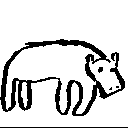

In [159]:
final_test("../datasets/train/animal/im_000005.png")

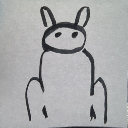